In [ ]:
import os
import zipfile

In [ ]:
!unzip "/content/archive (7).zip" -d "/content/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: /content/data/Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: /content/data/Alzheimer_

In [ ]:
my_data_dir = '/content/data/Alzheimer_s Dataset'

In [ ]:
os.listdir('/content/data/Alzheimer_s Dataset')

['train', 'test']

**Importing Necessary Libraries**


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

**Reading and Visualizing the Dataset**

In [ ]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/content/data/Alzheimer_s Dataset')):
    subfolder_path = os.path.join('/content/data/Alzheimer_s Dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 2/2 [00:00<00:00, 139.08it/s]


image             label
0     /content/data/Alzheimer_s Dataset/train/NonDem...       NonDemented
1     /content/data/Alzheimer_s Dataset/train/NonDem...       NonDemented
2     /content/data/Alzheimer_s Dataset/train/NonDem...       NonDemented
3     /content/data/Alzheimer_s Dataset/train/NonDem...       NonDemented
4     /content/data/Alzheimer_s Dataset/train/NonDem...       NonDemented
...                                                 ...               ...
6395  /content/data/Alzheimer_s Dataset/test/VeryMil...  VeryMildDemented
6396  /content/data/Alzheimer_s Dataset/test/VeryMil...  VeryMildDemented
6397  /content/data/Alzheimer_s Dataset/test/VeryMil...  VeryMildDemented
6398  /content/data/Alzheimer_s Dataset/test/VeryMil...  VeryMildDemented
6399  /content/data/Alzheimer_s Dataset/test/VeryMil...  VeryMildDemented

[6400 rows x 2 columns]

<ipython-input-4-be9dd1228c04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


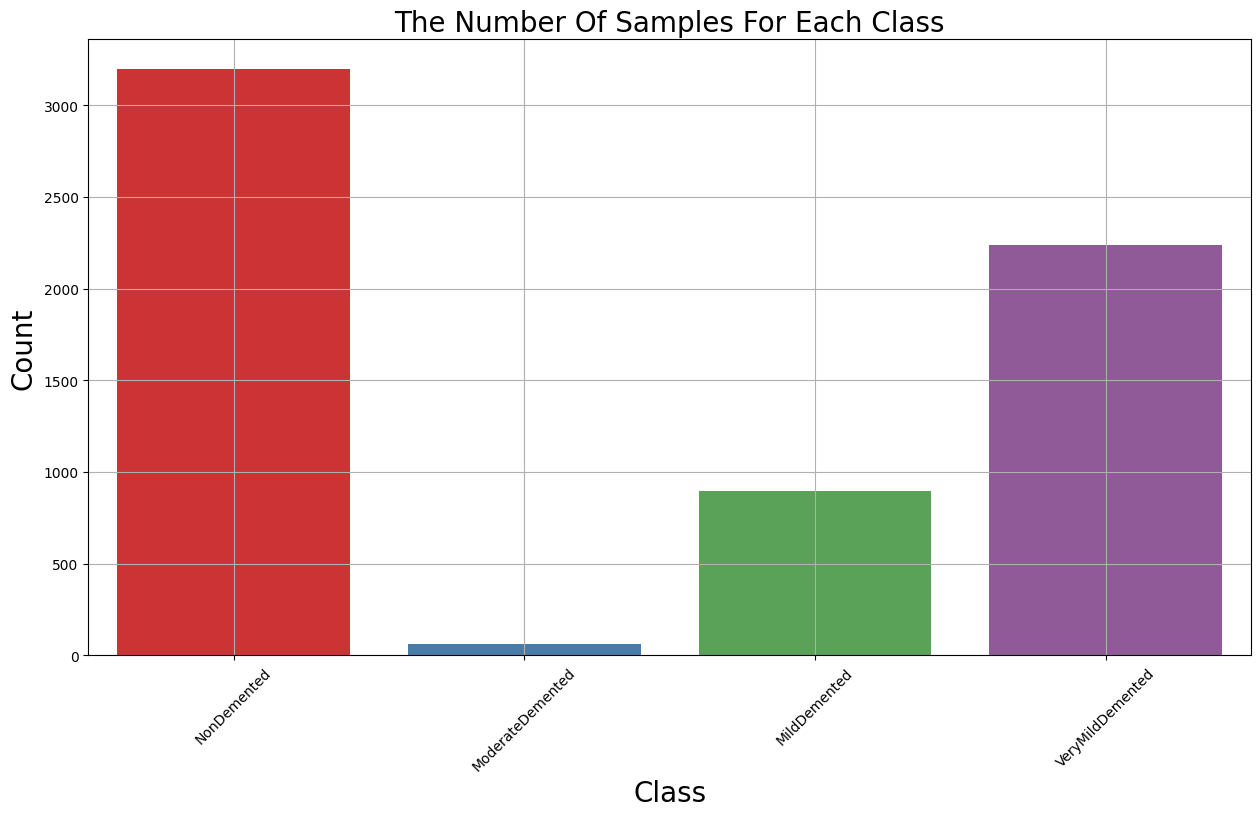

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

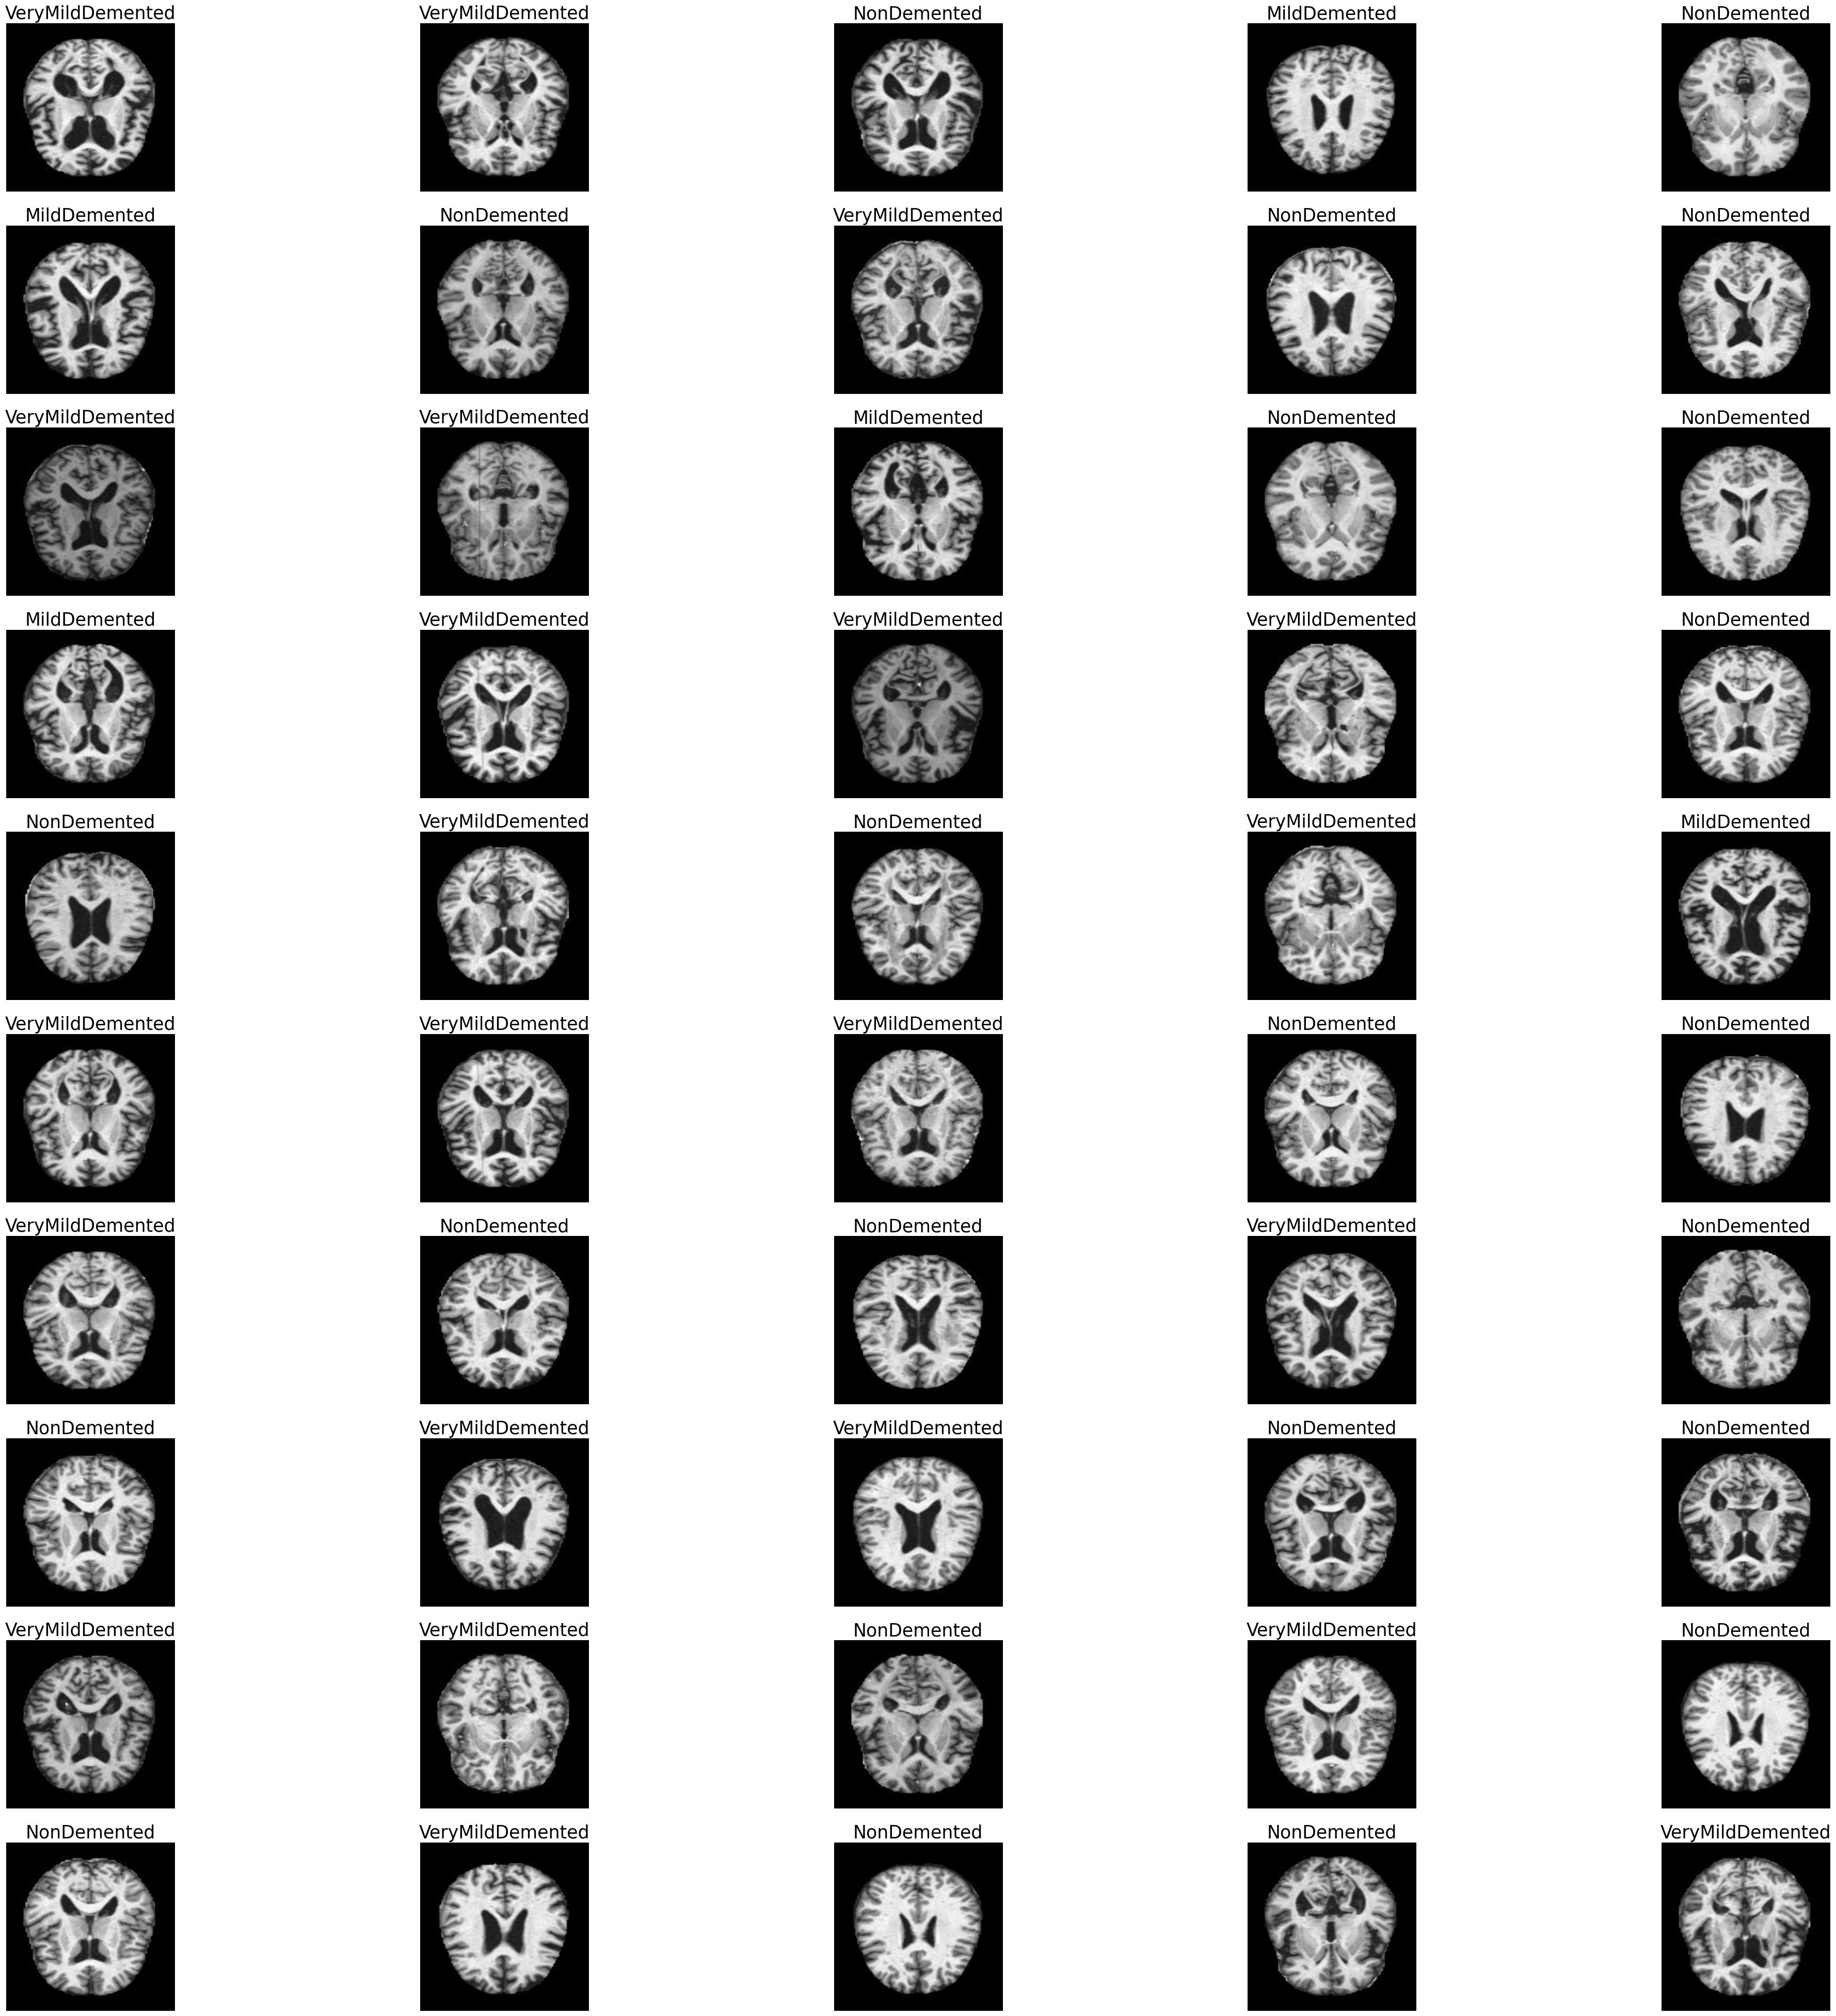

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)

**Data Augmentation and Handling Imbalanced Data**

Found 6400 validated image filenames belonging to 4 classes.
(12800, 32, 32, 3) (12800, 4)


<ipython-input-6-d2b5b95d2925>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=labels,palette='Set1')


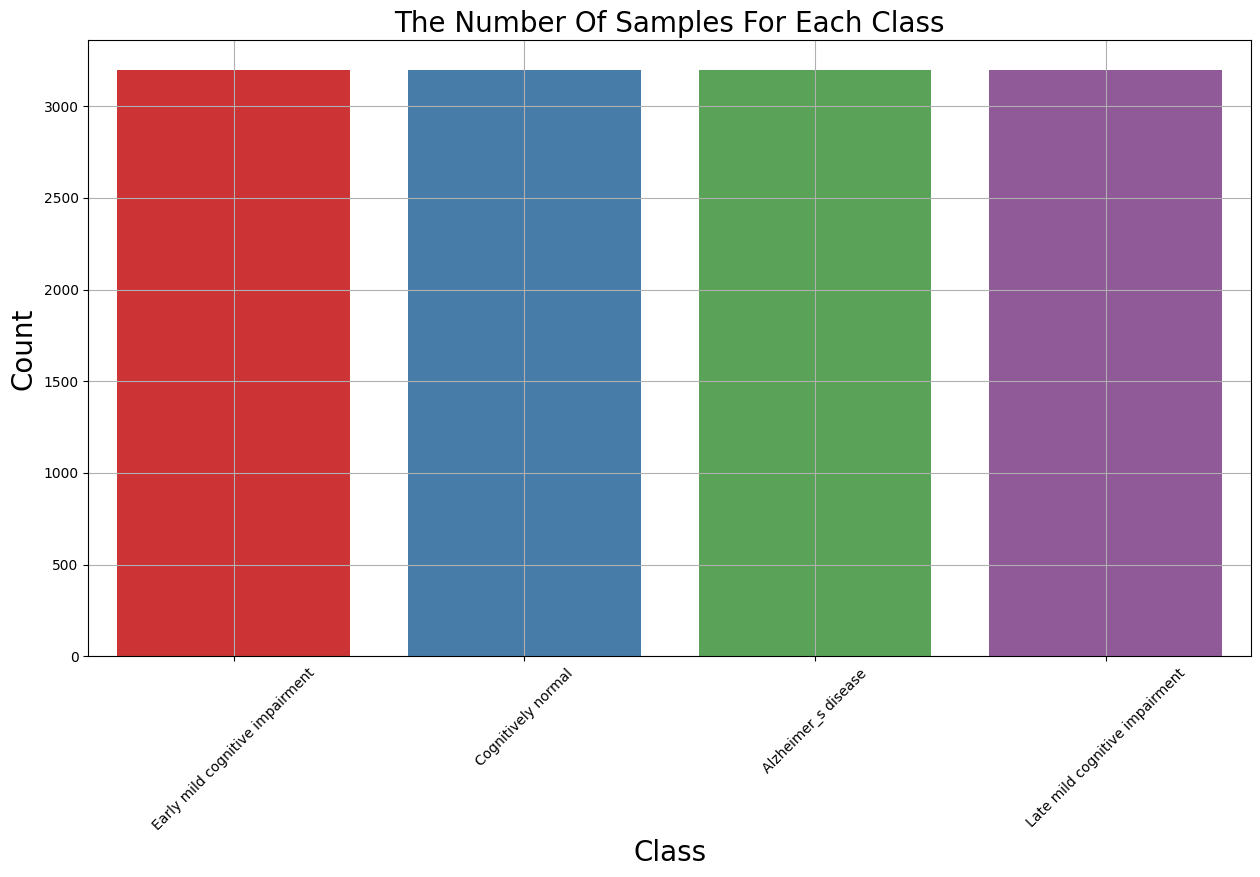

In [ ]:
Size=(32,32)
work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(df,x_col='image',y_col='label', target_size=Size, batch_size=6500, shuffle=False)
train_data, train_labels = train_data_gen.next()

class_num=np.sort(['Alzheimer_s disease','Cognitively normal','Early mild cognitive impairment','Late mild cognitive impairment'])
class_num

sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 32 * 32 * 3), train_labels)
train_data = train_data.reshape(-1, 32,32, 3)
print(train_data.shape, train_labels.shape)
labels=[class_num[i] for i in np.argmax(train_labels,axis=1) ]
plt.figure(figsize=(15,8))
ax = sns.countplot(x=labels,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Data Splitting for Training, Validation, and Testing**

In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(train_data,train_labels, test_size=0.3, random_state=42,shuffle=True,stratify=train_labels)
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (8960, 32, 32, 3)
X_test shape is  (1920, 32, 32, 3)
X_val shape is  (1920, 32, 32, 3)
y_train shape is  (8960, 4)
y_test shape is  (1920, 4)
y_val shape is  (1920, 4)


**Convolutional Neural Network (CNN) Modeling**

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(32,32,3))) # Updated input shape
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D((2,2),2,padding='same'))
model.add(keras.layers.Conv2D(128,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D((2,2),2,padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

**Model Architecture**

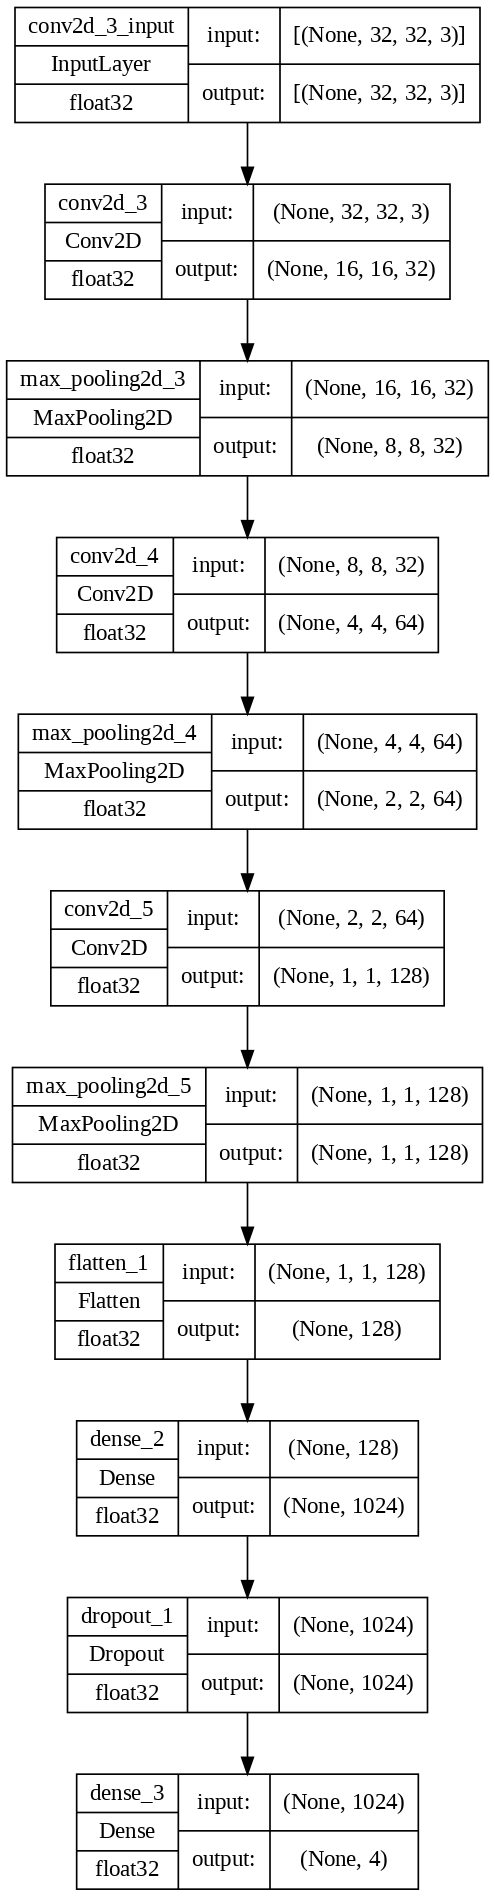

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

**Training the CNN Model**

In [ ]:
checkpoint_cb =ModelCheckpoint("CNN_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train,y_train, epochs=50, validation_data=(X_val,y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
280/280 [==============================] - 10s 23ms/step - loss: 0.2641 - accuracy: 0.8854 - val_loss: 0.2483 - val_accuracy: 0.8901
Epoch 2/50
280/280 [==============================] - 4s 13ms/step - loss: 0.2058 - accuracy: 0.9132 - val_loss: 0.2281 - val_accuracy: 0.9010
Epoch 3/50
280/280 [==============================] - 5s 18ms/step - loss: 0.1802 - accuracy: 0.9270 - val_loss: 0.2512 - val_accuracy: 0.9016
Epoch 4/50
280/280 [==============================] - 4s 13ms/step - loss: 0.1609 - accuracy: 0.9340 - val_loss: 0.2290 - val_accuracy: 0.9130
Epoch 5/50
280/280 [==============================] - 4s 14ms/step - loss: 0.1233 - accuracy: 0.9537 - val_loss: 0.2009 - val_accuracy: 0.9229
Epoch 6/50
280/280 [==============================] - 4s 16ms/step - loss: 0.1082 - accuracy: 0.9583 - val_loss: 0.1685 - val_accuracy: 0.9359
Epoch 7/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0916 - accuracy: 0.9646 - val_loss: 0.1649 - val_accuracy: 0.939

**Model Evaluation and Predictions**

In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0   0.264133  0.885379  0.248333      0.890104
1   0.205830  0.913170  0.228091      0.901042
2   0.180194  0.927009  0.251191      0.901563
3   0.160936  0.934040  0.229001      0.913021
4   0.123335  0.953683  0.200899      0.922917
5   0.108234  0.958259  0.168495      0.935938
6   0.091619  0.964621  0.164910      0.939062
7   0.066003  0.976897  0.176759      0.944792
8   0.077249  0.971763  0.157790      0.945312
9   0.063019  0.978237  0.124662      0.959896
10  0.059345  0.977232  0.154930      0.942187
11  0.059543  0.977009  0.251193      0.920833
12  0.040747  0.986496  0.132389      0.958333
13  0.041115  0.986384  0.114238      0.967708
14  0.046315  0.982813  0.131806      0.958854
15  0.040217  0.985156  0.096776      0.971354
16  0.052955  0.980580  0.111063      0.963542
17  0.029998  0.990179  0.118583      0.966146
18  0.032678  0.988058  0.109316      0.967708
19  0.029222  0.990067  0.196235      0.940625
20  0.050289  0.983482  0.120744      0.963542
21  0.034313  0.987500  0.122789      0.965104
22  0.024520  0.991406  0.098451      0.974479
23  0.032766  0.988170  0.169392      0.939583
24  0.020062  0.993192  0.172186      0.952604
25  0.036781  0.988170  0.091785      0.975000
26  0.035753  0.987277  0.112682      0.967708
27  0.029723  0.989062  0.185586      0.948438
28  0.034511  0.990179  0.149403      0.947917
29  0.019473  0.993862  0.156050      0.953646
30  0.026599  0.991853  0.109555      0.975521
31  0.021209  0.992969  0.216822      0.939062
32  0.033528  0.987612  0.199920      0.947917
33  0.024446  0.992411  0.223978      0.947917
34  0.008936  0.996875  0.088671      0.977604
35  0.010243  0.996317  0.166284      0.965625
36  0.031275  0.988728  0.084598      0.975000
37  0.035728  0.987388  0.244344      0.947396
38  0.017565  0.993527  0.087524      0.978646
39  0.020663  0.993080  0.102183      0.974479
40  0.009649  0.996987  0.105546      0.972917
41  0.033533  0.988728  0.116380      0.970833
42  0.003835  0.999107  0.059071      0.983333
43  0.038090  0.987277  0.070449      0.982292
44  0.003235  0.999219  0.134003      0.975521
45  0.029189  0.990290  0.105195      0.975521
46  0.030218  0.990402  0.075788      0.979688
47  0.011887  0.995089  0.110704      0.967708
48  0.022986  0.991406  0.107924      0.968229
49  0.018838  0.993415  0.061195      0.984896

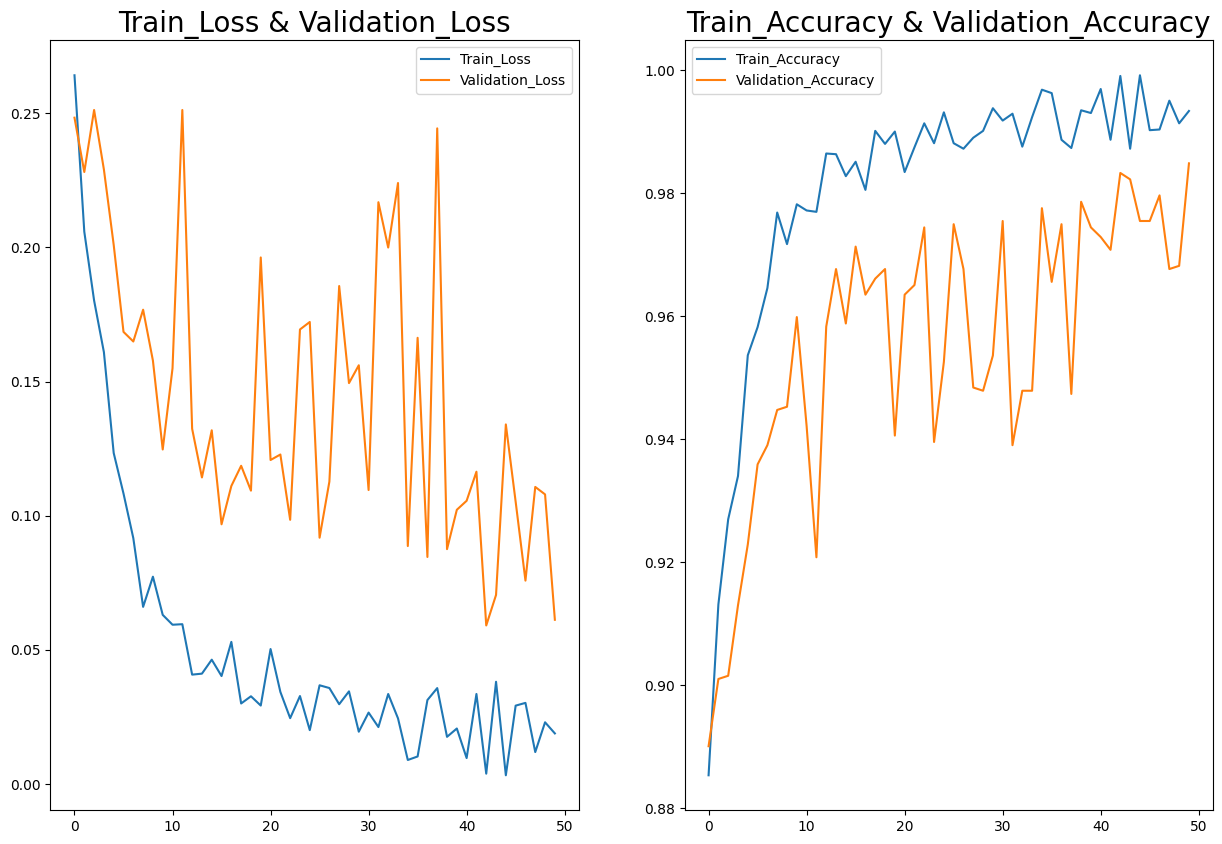

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [ ]:
score, acc= model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

60/60 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 0.9745
Test Loss = 0.09762401878833771
Test Accuracy = 0.9744791388511658


In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)
y_test_ = np.argmax(y_test,axis=1)
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

60/60 [==============================] - 0s 5ms/step


Actual  Prediction
0          1           1
1          1           1
2          0           0
3          2           2
4          2           2
...      ...         ...
1915       2           2
1916       0           0
1917       2           2
1918       3           3
1919       3           3

[1920 rows x 2 columns]

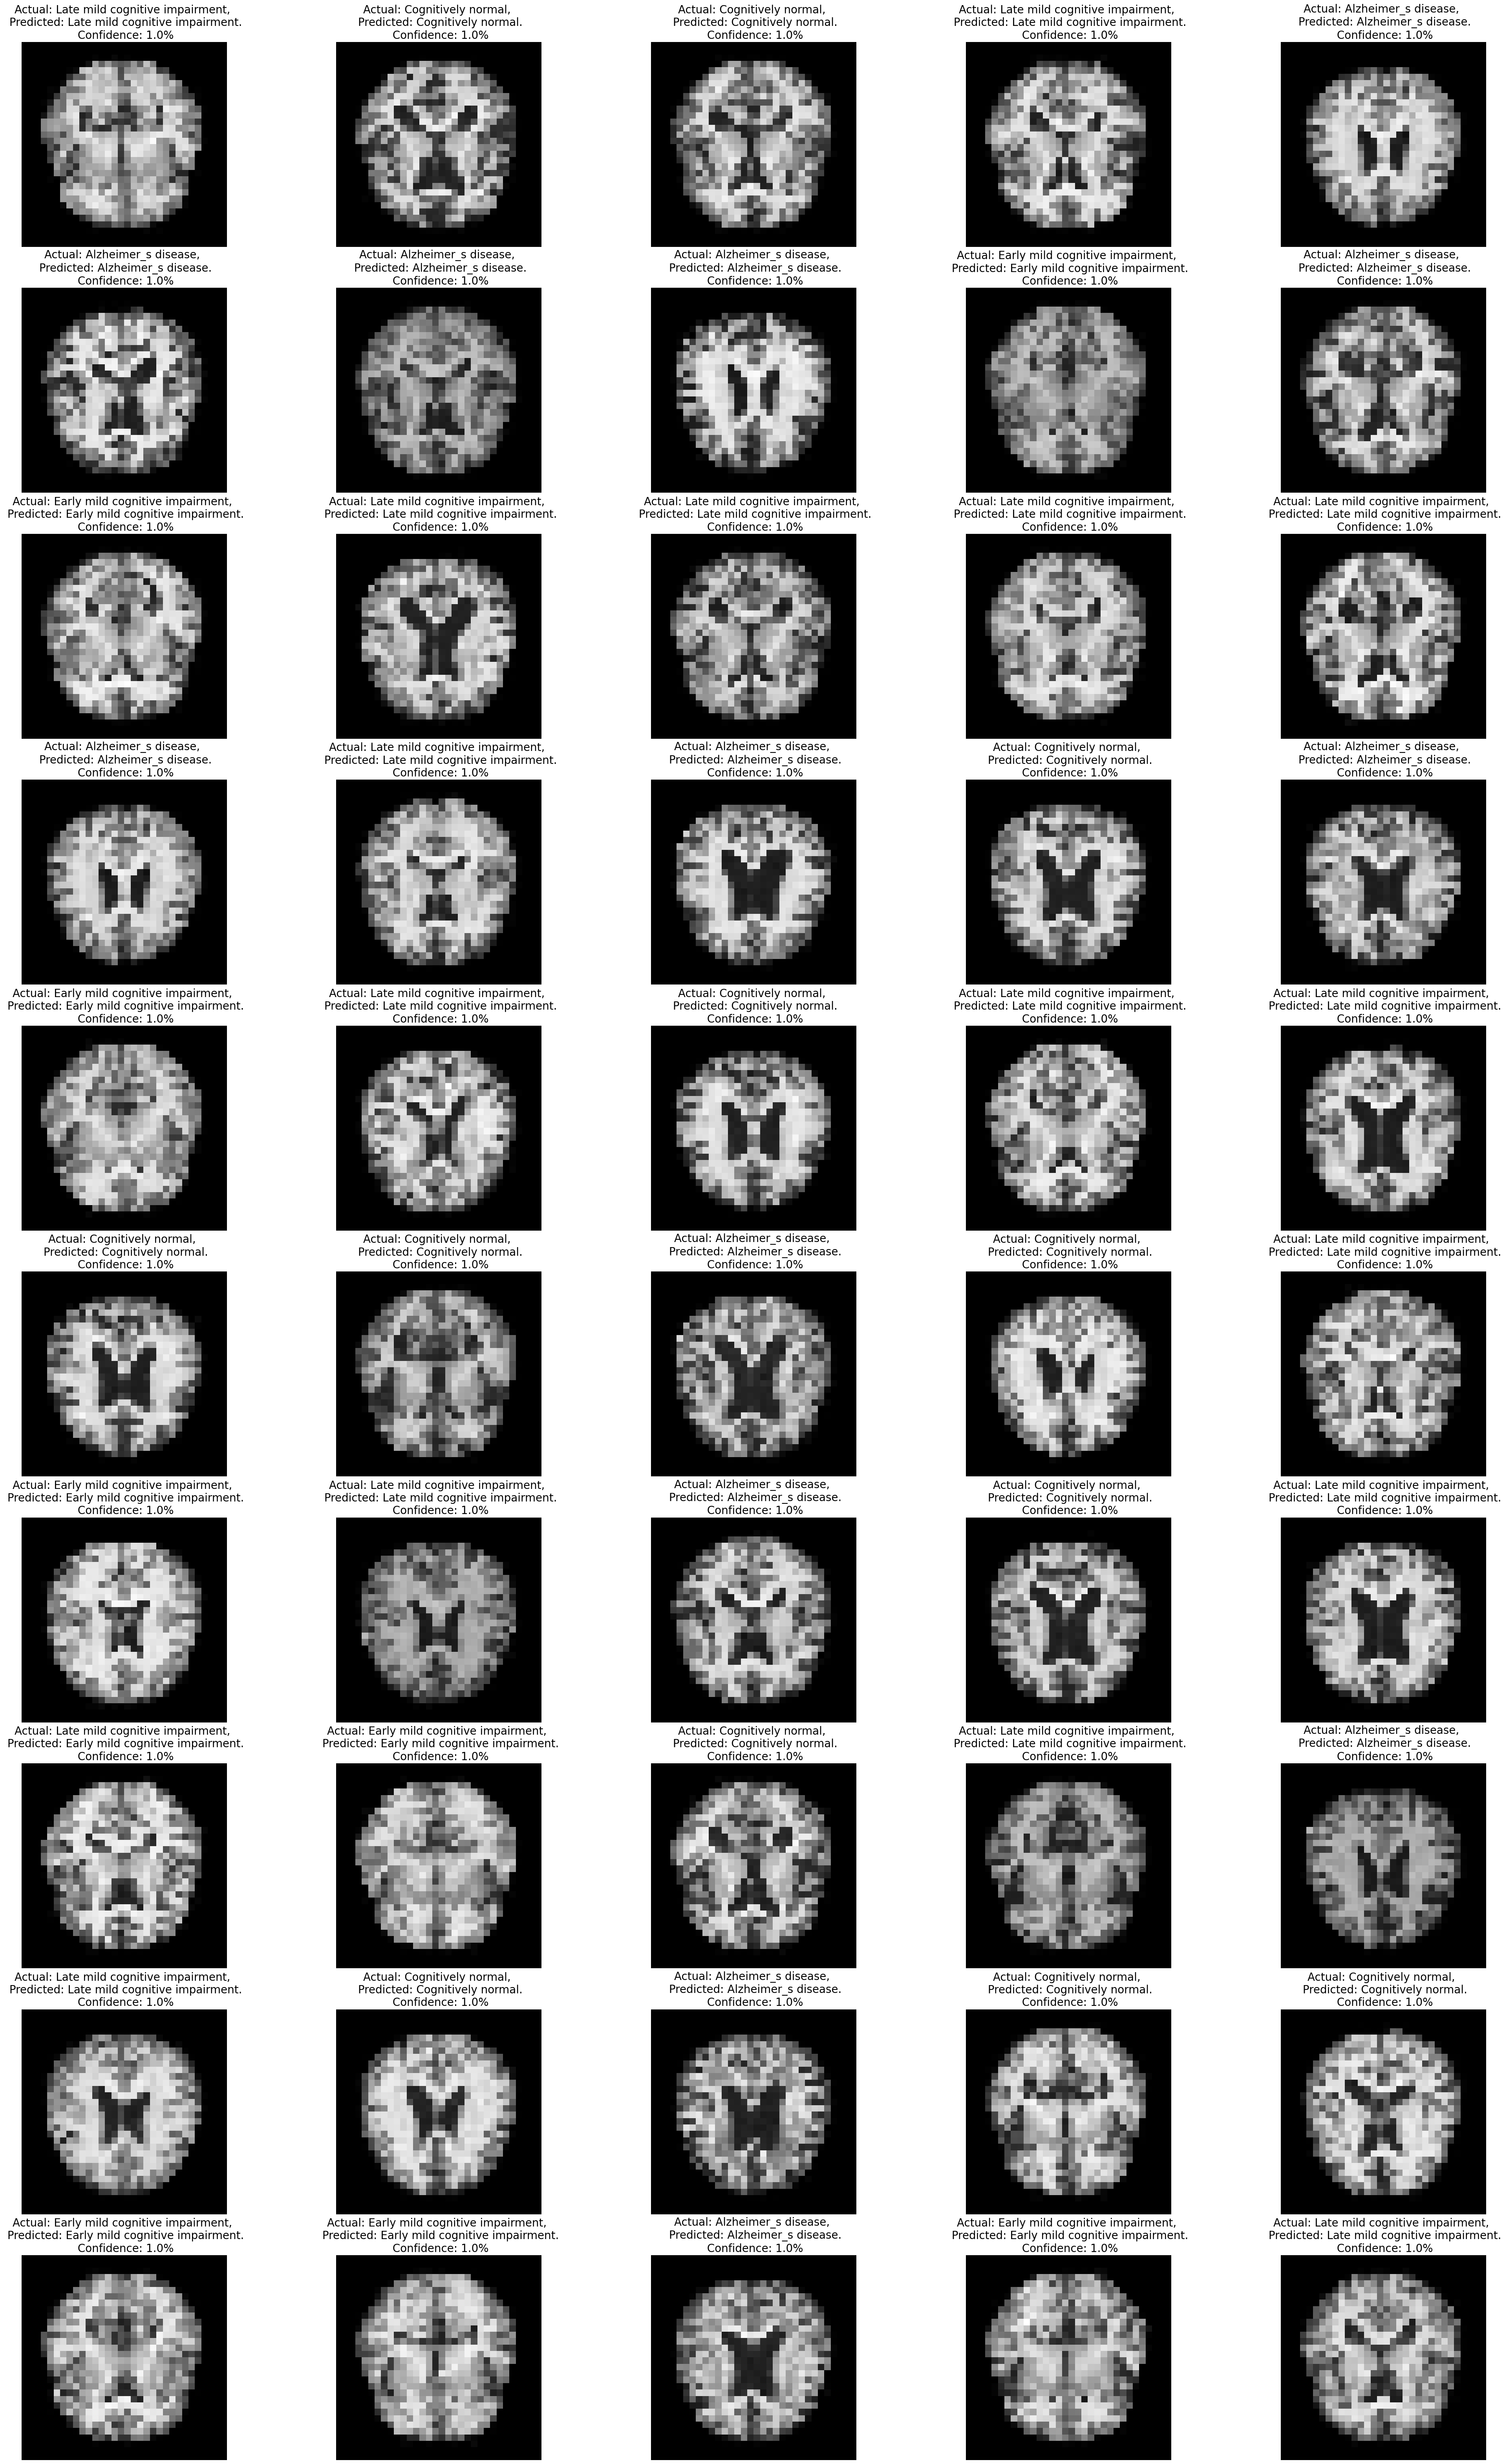

In [ ]:
plt.figure(figsize=(50,80))
for n,i in enumerate(np.random.randint(0,len(X_test),50)):
    plt.subplot(10,5,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Actual: {class_num[y_test_[i]]}, \n Predicted: {class_num[y_pred[i]]}.\n Confidence: {round(predictions[i][np.argmax(predictions[i])],0)}%",fontsize=20)

**Confusion Matrix and Classification Report**

array([[479,   0,   0,   1],
       [  0, 480,   0,   0],
       [  5,   0, 458,  17],
       [  2,   0,  24, 454]])

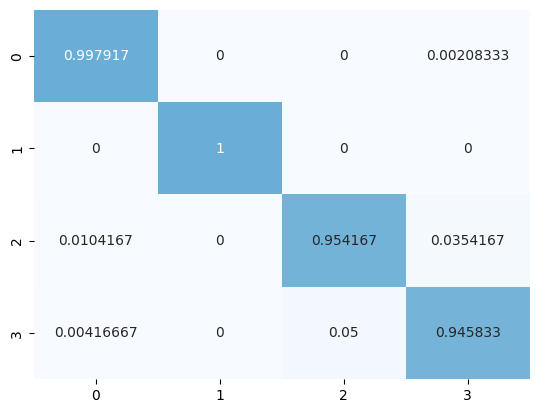

In [ ]:
CM = confusion_matrix(y_test_,y_pred)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [ ]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      1.00      0.99       480
           1       1.00      1.00      1.00       480
           2       0.95      0.95      0.95       480
           3       0.96      0.95      0.95       480

    accuracy                           0.97      1920
   macro avg       0.97      0.97      0.97      1920
weighted avg       0.97      0.97      0.97      1920

